## **Evaluation of the Results**

This notebook analyzes the performance of all phylogenetic inference runs across DNA/AA datasets and difficulty levels. Together, these analyses provide a compact assessment of algorithm performance and tuning behavior.

**Library import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.ticker import ScalarFormatter

**Data preparation**

In [2]:
# Configuration for better visualization
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150  # Higher resolution

# Load data (file name is Data_Fused.csv with semicolon as separator)
df = pd.read_csv('Data.csv', delimiter=';')

df.head()  # Display the first rows of the DataFrame

,Type,Difficulty,Epsilon,Dataset,Sequence_Number,Alignment_Length,Model,GAPS,Max_iters,Runtime (s),Final_Log-likelihood,RF_distance,Normalized_RF_distance,Output_Complete,Files_Complete,Comment
0,dna,easy,0.001,jarvd5a_intron_1521.processed.fasta,46,16250,GTR,pip,5,2322.0,-401257.92930,58.0,0.6591,1,1,NaN
1,dna,easy,0.001,jarvd5b_bin.1136.processed.fasta,48,14401,GTR,pip,5,1672.0,-339872.92810,74.0,0.8043,1,1,NaN
2,dna,easy,0.001,misod2a_EOG5CVDNS.processed.fasta,134,3261,GTR,pip,5,9815.0,-331430.79060,166.0,0.6288,1,1,NaN
3,dna,easy,0.001,misod2b_EOG5CVDNS.processed.fasta,134,2174,GTR,pip,5,5082.0,-149770.57150,170.0,0.6439,1,1,NaN
4,dna,easy,0.001,prumd6_L37.processed.fasta,200,1645,GTR,pip,5,6309.0,-75654.06647,96.0,0.2424,1,1,NaN


In [3]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')

# Prepare dataset for correlation analysis:
# We remove rows with missing values (NaN) in the critical numerical columns.
# This is important for accurate correlation calculations.
df_clean = df.dropna(subset=['Runtime_s', 'Normalized_RF_distance', 'Final_Log_likelihood'])

df_clean.head()  # Display the first rows of the cleaned DataFrame

,Type,Difficulty,Epsilon,Dataset,Sequence_Number,Alignment_Length,Model,GAPS,Max_iters,Runtime_s,Final_Log_likelihood,RF_distance,Normalized_RF_distance,Output_Complete,Files_Complete,Comment
0,dna,easy,0.001,jarvd5a_intron_1521.processed.fasta,46,16250,GTR,pip,5,2322.0,-401257.92930,58.0,0.6591,1,1,NaN
1,dna,easy,0.001,jarvd5b_bin.1136.processed.fasta,48,14401,GTR,pip,5,1672.0,-339872.92810,74.0,0.8043,1,1,NaN
2,dna,easy,0.001,misod2a_EOG5CVDNS.processed.fasta,134,3261,GTR,pip,5,9815.0,-331430.79060,166.0,0.6288,1,1,NaN
3,dna,easy,0.001,misod2b_EOG5CVDNS.processed.fasta,134,2174,GTR,pip,5,5082.0,-149770.57150,170.0,0.6439,1,1,NaN
4,dna,easy,0.001,prumd6_L37.processed.fasta,200,1645,GTR,pip,5,6309.0,-75654.06647,96.0,0.2424,1,1,NaN


In [4]:
print("Data cleaning completed. NaN values are removed for the correlation analysis.")
print(f"Original number of rows: {len(df)}")
print(f"Cleaned number of rows (for correlation): {len(df_clean)}")

Data cleaning completed. NaN values are removed for the correlation analysis.
Original number of rows: 413
Cleaned number of rows (for correlation): 387


**Statistic Analysis: Correlation Matric**

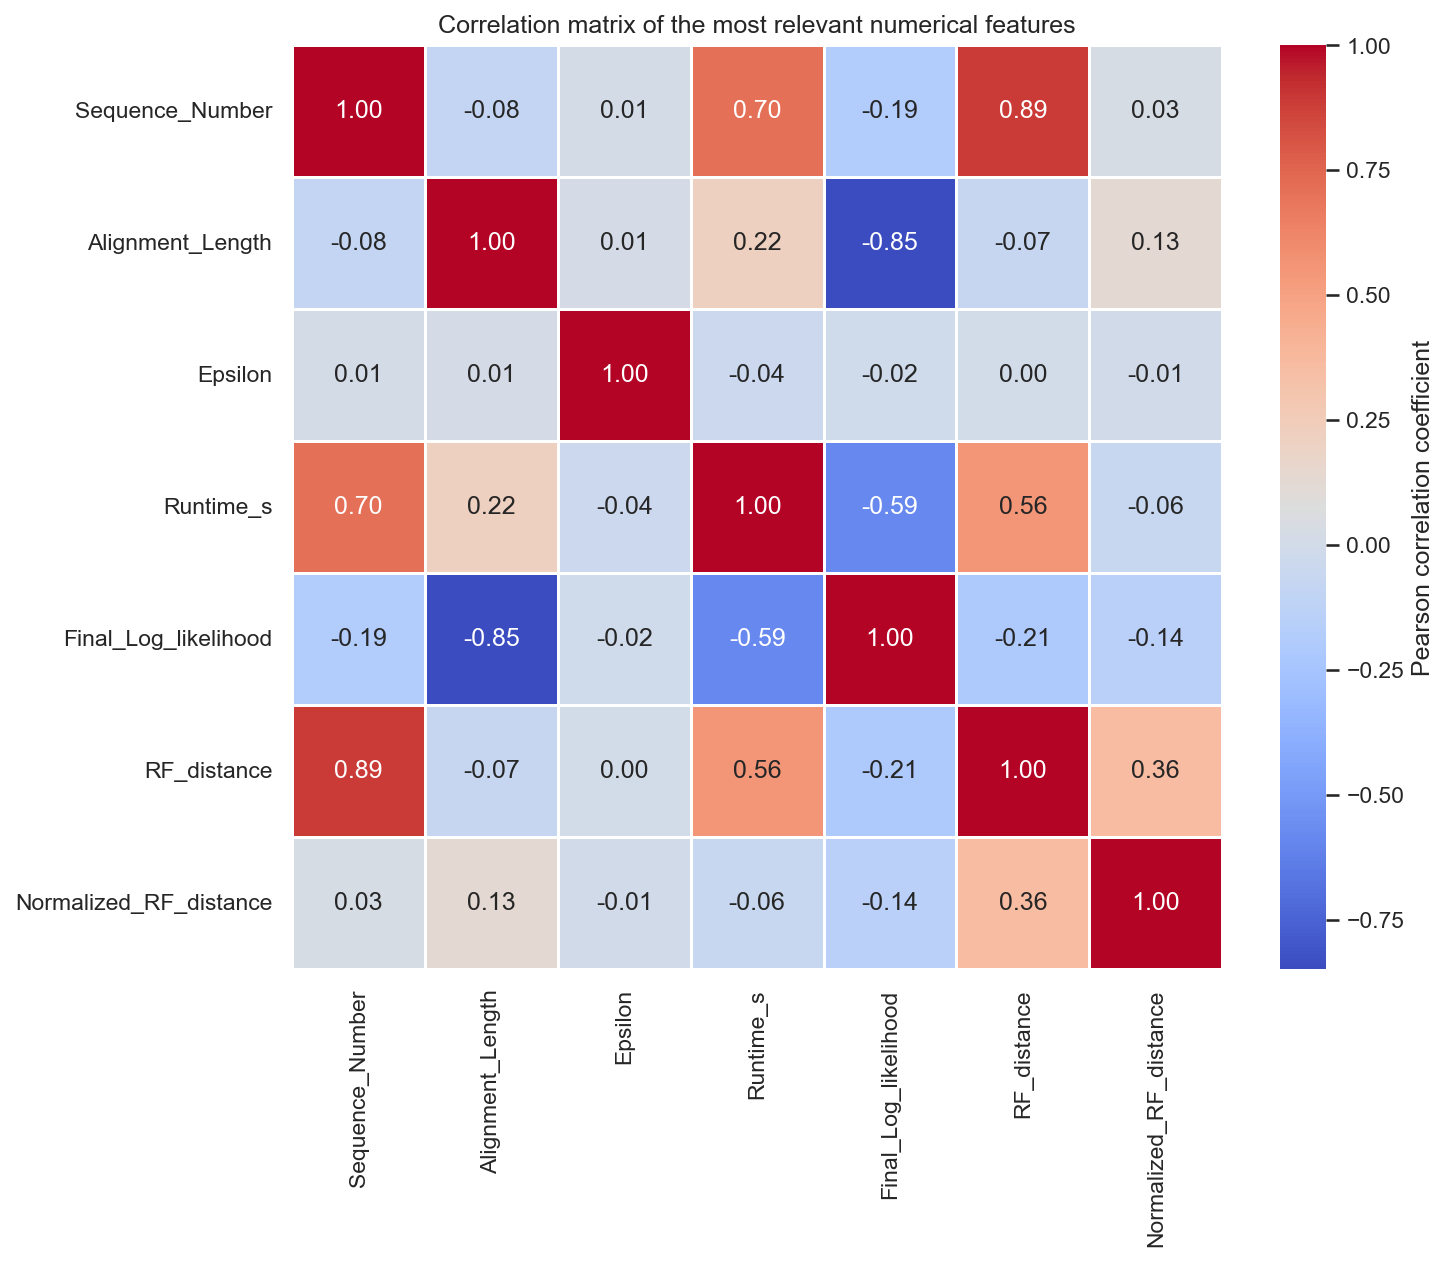

In [5]:
# Selection of relevant numerical columns
numeric_cols = [
    'Sequence_Number', 'Alignment_Length', 'Epsilon',
    'Runtime_s', 'Final_Log_likelihood', 'RF_distance',
    'Normalized_RF_distance'
]

# Compute correlation matrix
correlation_matrix = df_clean[numeric_cols].corr()

# Visualize as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show correlation values in the plot
    fmt=".2f",               # Format to 2 decimal places
    cmap='coolwarm',         # Color palette (red for negative, blue for positive)
    linewidths=.5,           # Lines between cells
    cbar_kws={'label': 'Pearson correlation coefficient'}  # Color bar label
)
plt.title('Correlation matrix of the most relevant numerical features')
plt.show()

**Distribution analysis per epsilon**

Boxplot

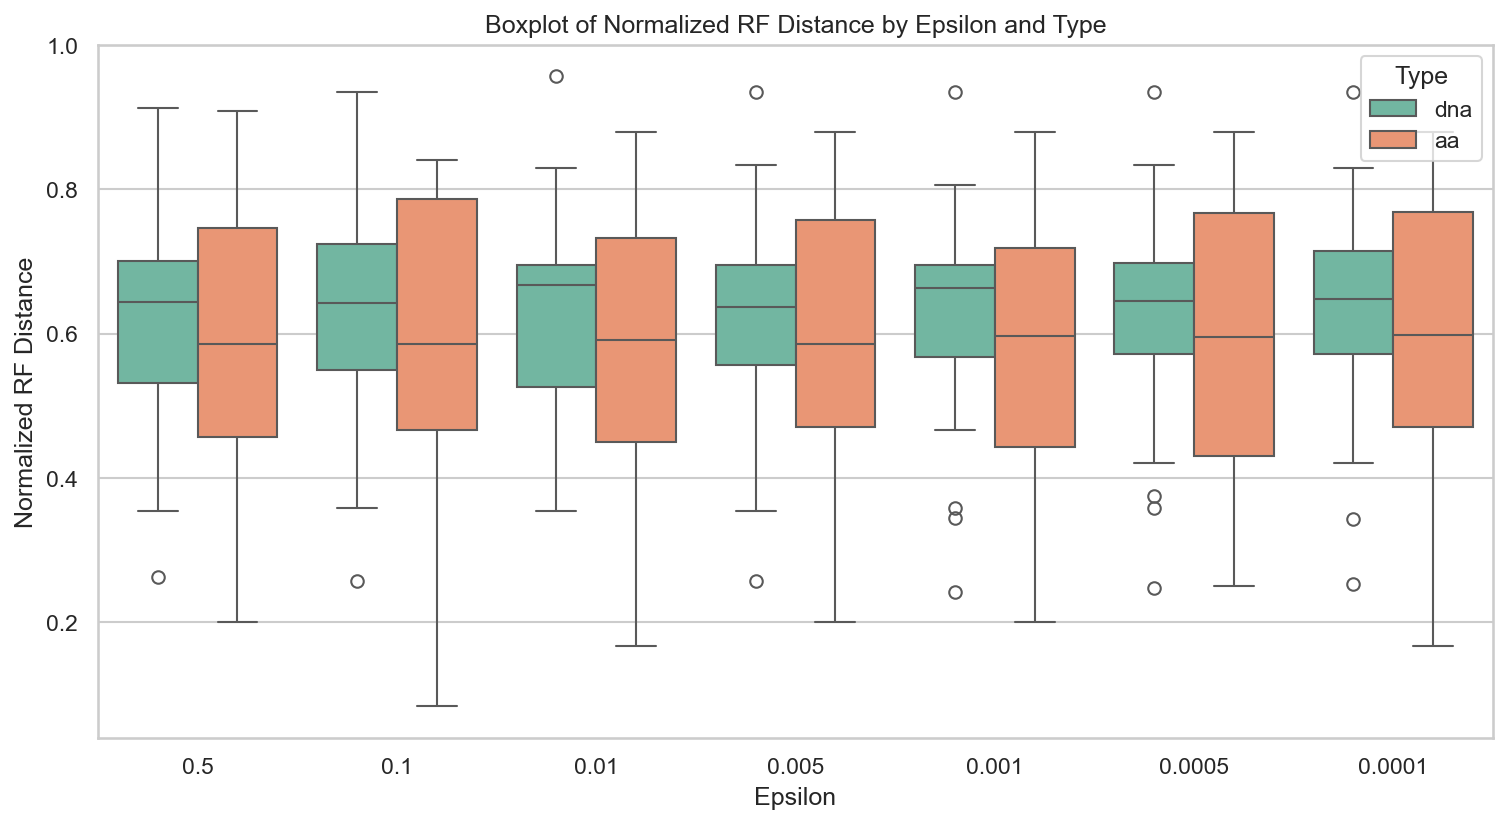

In [6]:
# Prepare the epsilon column for grouping
df['Epsilon_Str'] = df['Epsilon'].astype(str)
epsilon_order = sorted(df['Epsilon'].unique(), reverse=True)
epsilon_str_order = [str(e) for e in epsilon_order]

# Box plot of normalized RF distance per epsilon, grouped by type
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Epsilon_Str',
    y='Normalized_RF_distance',
    hue='Type',  # New grouping: Type (aa vs. dna)
    data=df,
    order=epsilon_str_order,
    palette='Set2'
)
plt.title('Boxplot of Normalized RF Distance by Epsilon and Type')
plt.xlabel('Epsilon')
plt.ylabel('Normalized RF Distance')
plt.legend(title='Type', loc='upper right')
plt.show()

Violinplot

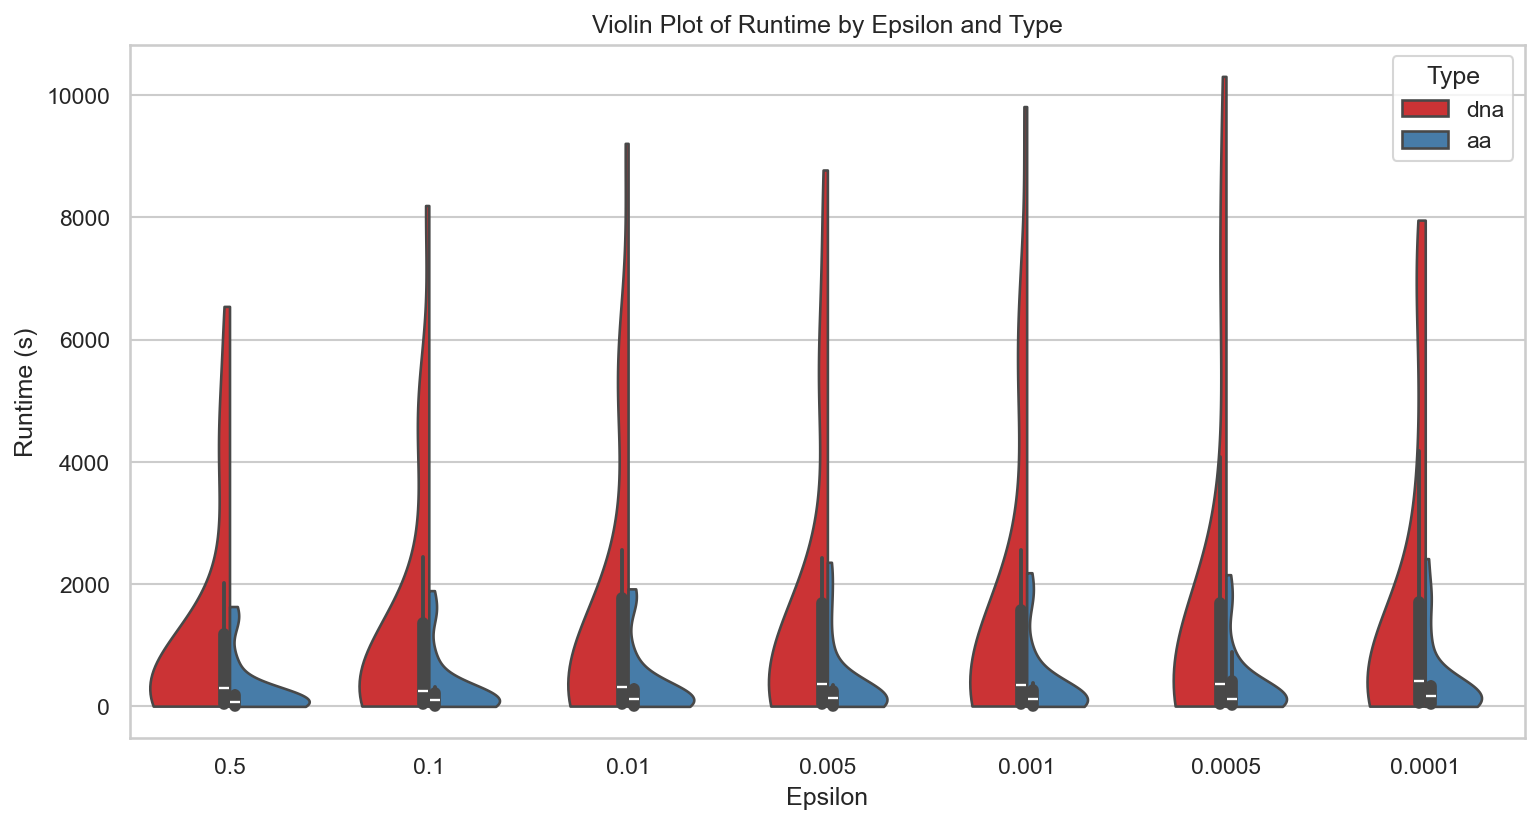

In [7]:
# Violin plot of runtime per epsilon, grouped by type
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='Epsilon_Str',
    y='Runtime_s',
    hue='Type',  # New grouping: Type (aa vs. dna)
    data=df,
    order=epsilon_str_order,
    cut=0,       # Do not trim the density
    palette='Set1',
    split=True   # Split the violins for better comparison at the same x-position
)
plt.title('Violin Plot of Runtime by Epsilon and Type')
plt.xlabel('Epsilon')
plt.ylabel('Runtime (s)')
plt.legend(title='Type', loc='upper right')
plt.show()

Tuning-Parameter-Analysis: RF-Distance vs. Epsilon

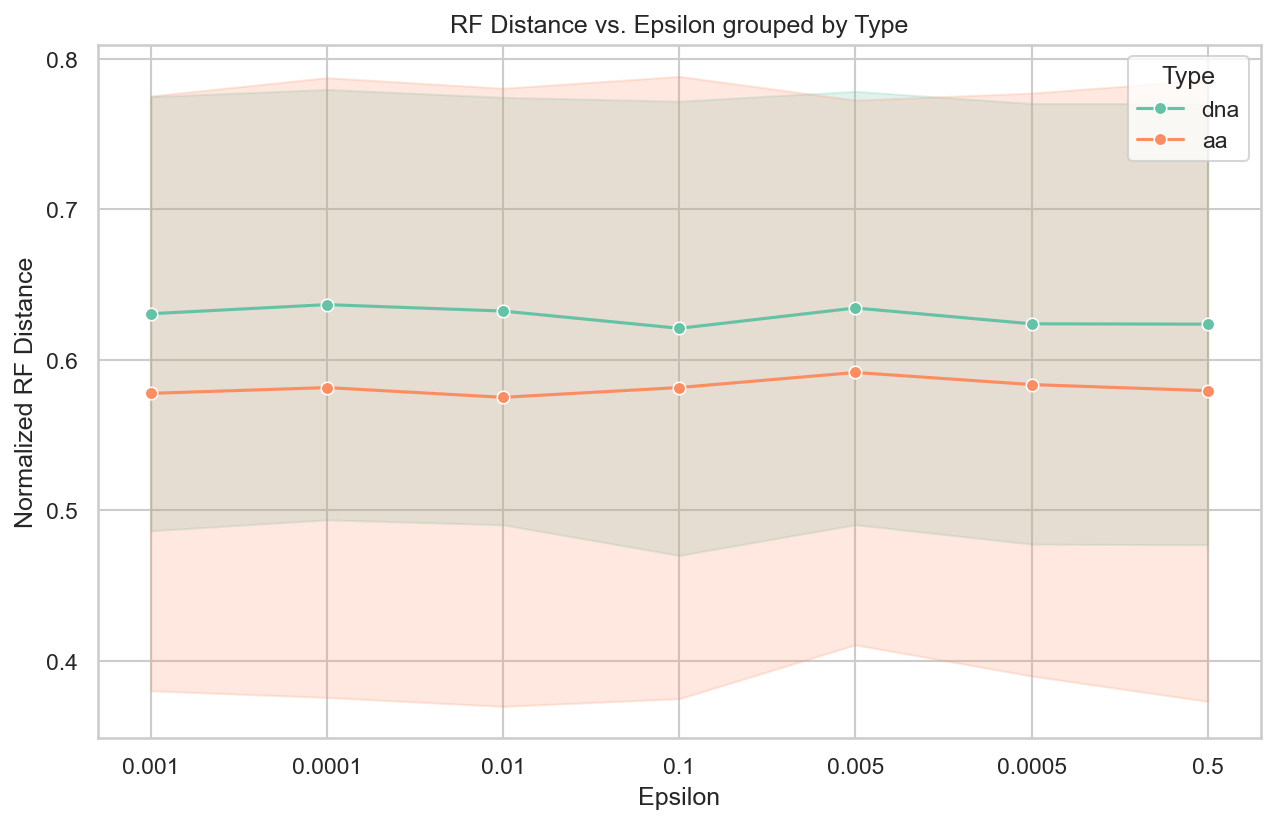

In [9]:
# Load and clean data (as in previous steps)
df = pd.read_csv('Data.csv', delimiter=';')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')
df['Epsilon_Str'] = df['Epsilon'].astype(str)
epsilon_str_order = [str(e) for e in sorted(df['Epsilon'].unique(), reverse=True)]

# Tuning parameter analysis: RF distance vs. epsilon (grouped by type)
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Epsilon_Str',
    y='Normalized_RF_distance',
    hue='Type',
    data=df,
    errorbar='sd',   # Show standard deviation
    marker='o',
    dashes=False,
    palette='Set2',
)
plt.title('RF Distance vs. Epsilon grouped by Type')
plt.xlabel('Epsilon')
plt.ylabel('Normalized RF Distance')
plt.legend(title='Type', loc='upper right')
plt.show()

Tree quality (RF-Distance) vs. Alignment length

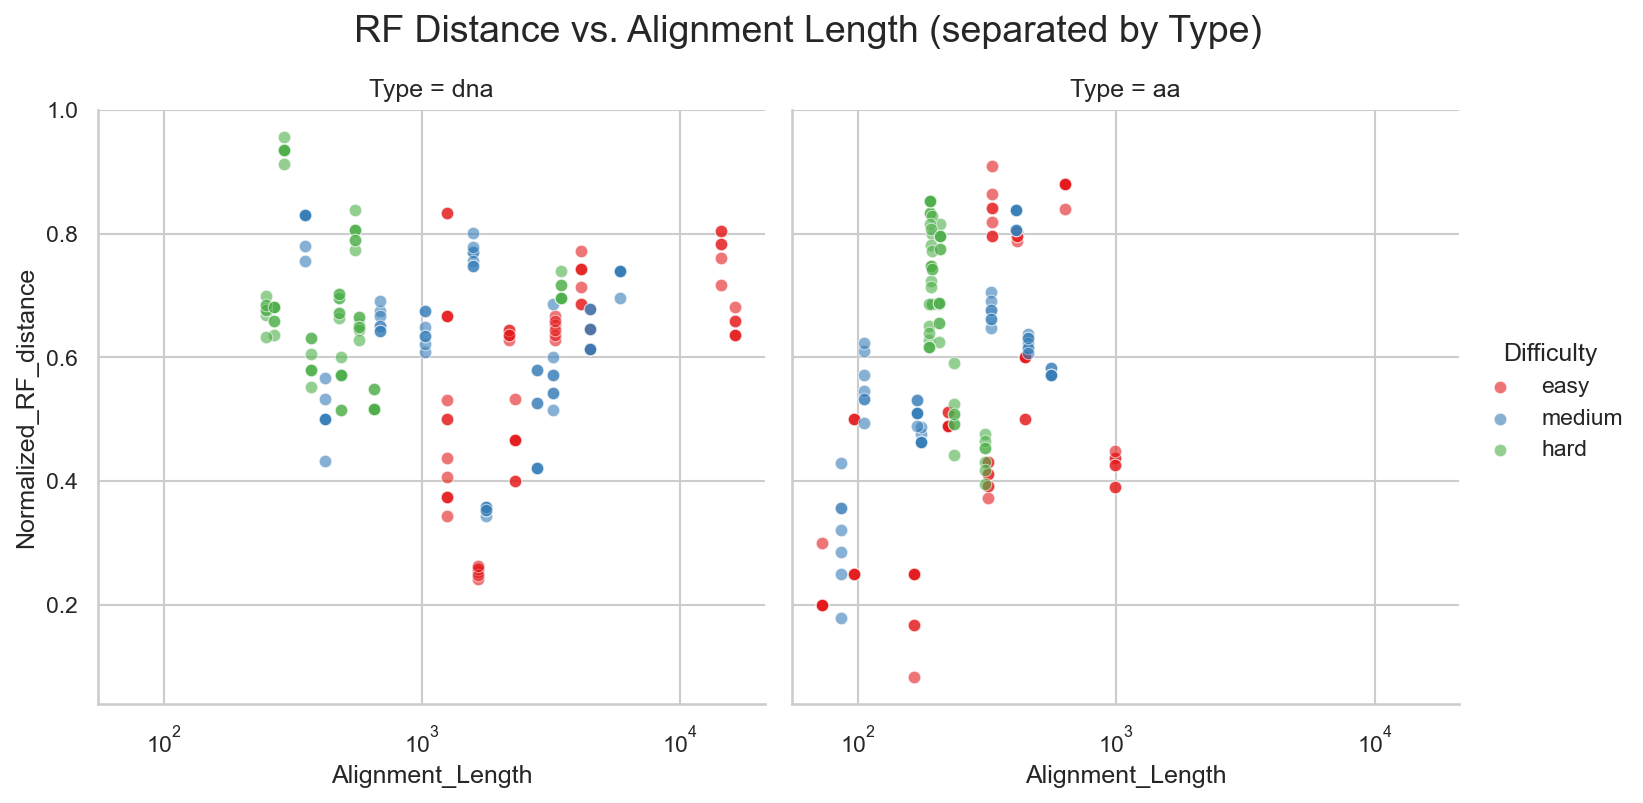

In [ ]:
g = sns.FacetGrid(
    df, col='Type', hue='Difficulty',
    palette='Set1', height=5
)
g.map_dataframe(
    sns.scatterplot,
    x='Alignment_Length',
    y='Normalized_RF_distance',
    alpha=0.6
)
g.set(xscale='log')
g.add_legend()

g.fig.suptitle("RF Distance vs. Alignment Length (separated by Type)", 
               fontsize=18, y=1.05)

plt.show()

RF-Distance vs. Sequence Number

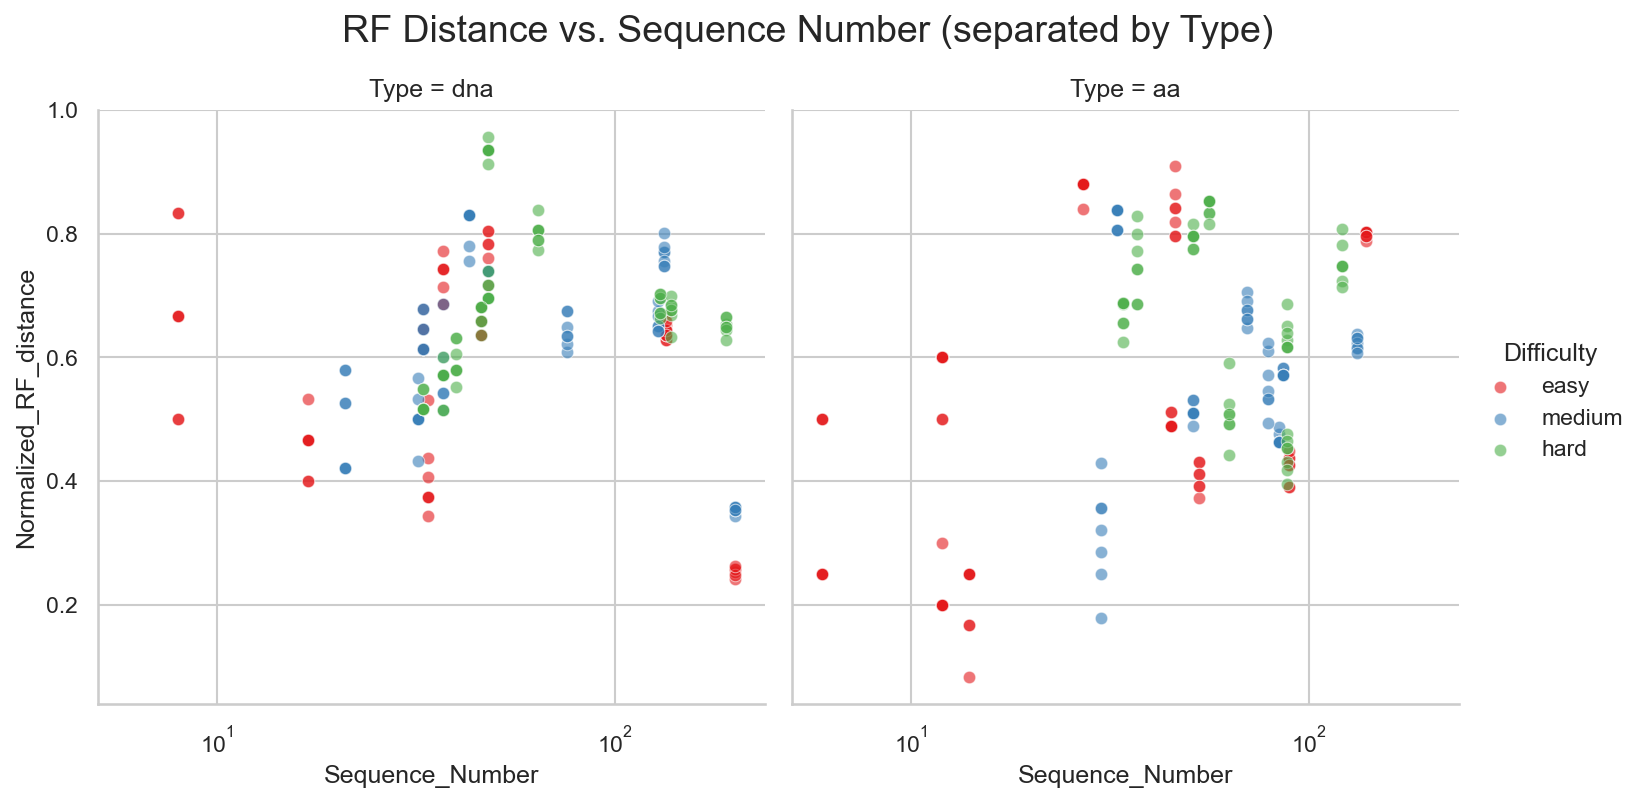

In [16]:
g = sns.FacetGrid(
    df, col='Type', hue='Difficulty',
    palette='Set1', height=5
)
g.map_dataframe(
    sns.scatterplot,
    x='Sequence_Number',
    y='Normalized_RF_distance',
    alpha=0.6
)
g.set(xscale='log')
g.add_legend()

g.fig.suptitle("RF Distance vs. Sequence Number (separated by Type)", 
               fontsize=18, y=1.05)

plt.show()

RF-Distance (Start vs. Final) vs. Max_iters

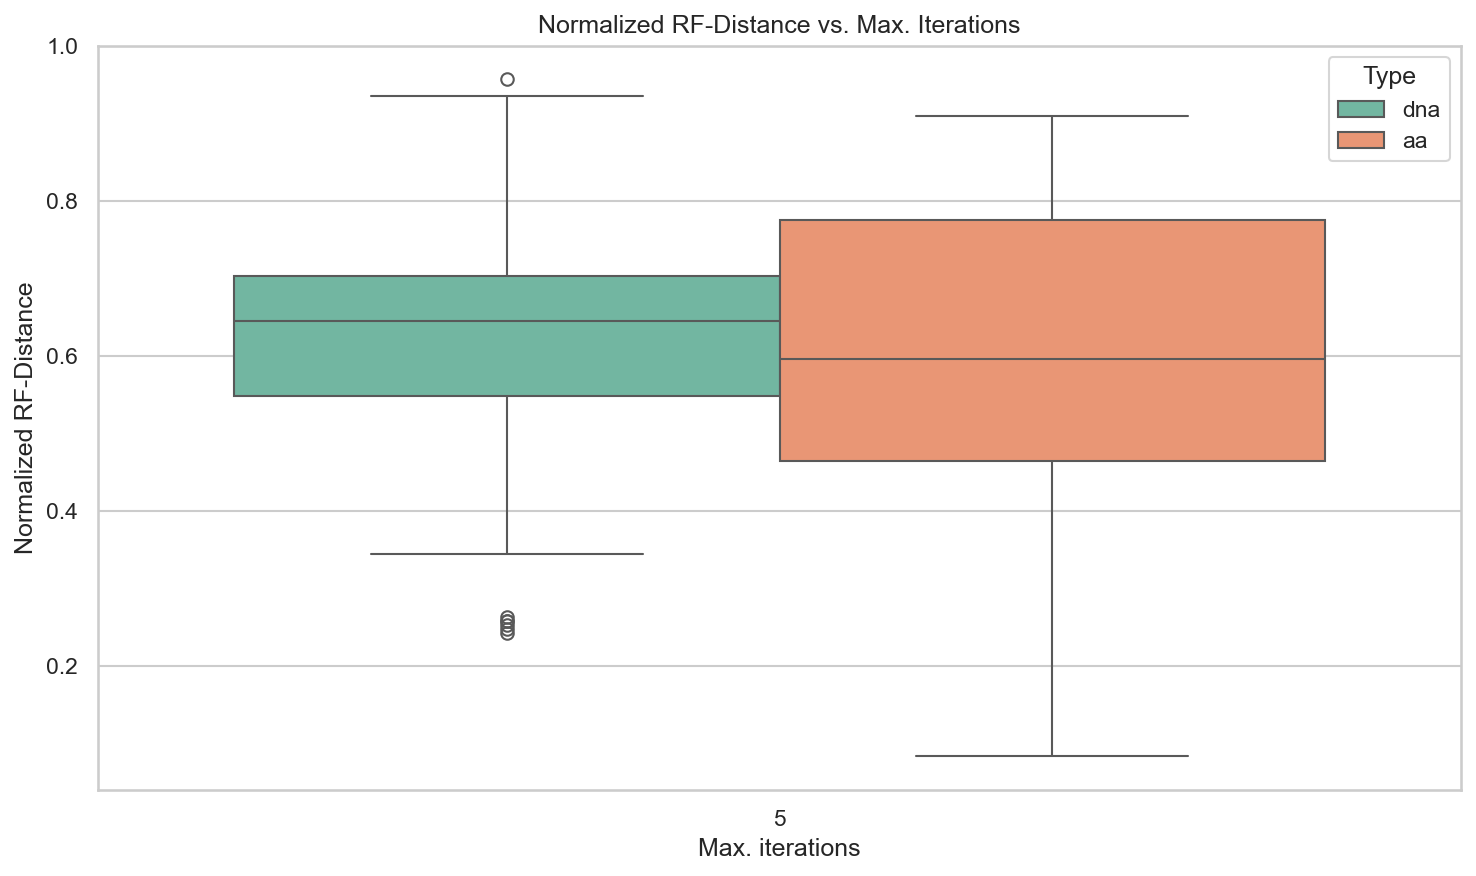

In [ ]:
# The Normalized_RF_distance is interpreted here as the distance between the start and end tree,
# which reflects the search progress.
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='Max_iters',
    y='Normalized_RF_distance',
    hue='Type',
    palette='Set2'
)
plt.title("Normalized RF Distance vs. Max Iterations")
plt.xlabel("Max iterations")
plt.ylabel("Normalized RF Distance")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Log-Likelihood vs. Difficulty

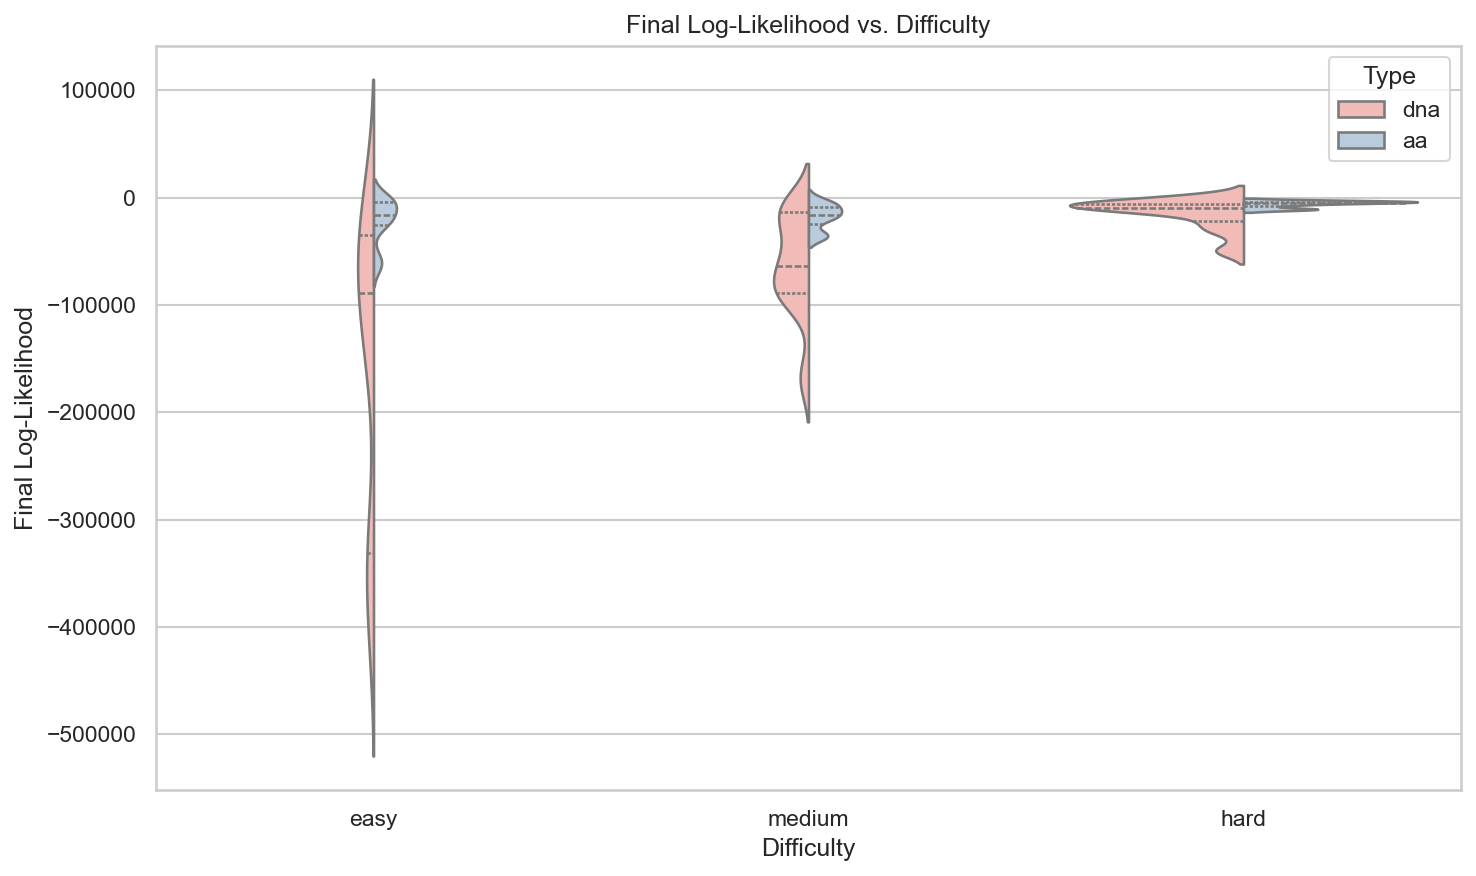

In [ ]:
difficulty_order = ['easy', 'medium', 'hard']
df_clean['Difficulty'] = pd.Categorical(df_clean['Difficulty'], categories=difficulty_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_clean,
    x='Difficulty',
    y='Final_Log_likelihood',
    order=difficulty_order,
    hue='Type',
    split=True,
    inner='quartile',
    palette='Pastel1'
)
plt.title("Final Log-Likelihood vs. Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Final Log-Likelihood")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Runtime vs. Difficulty

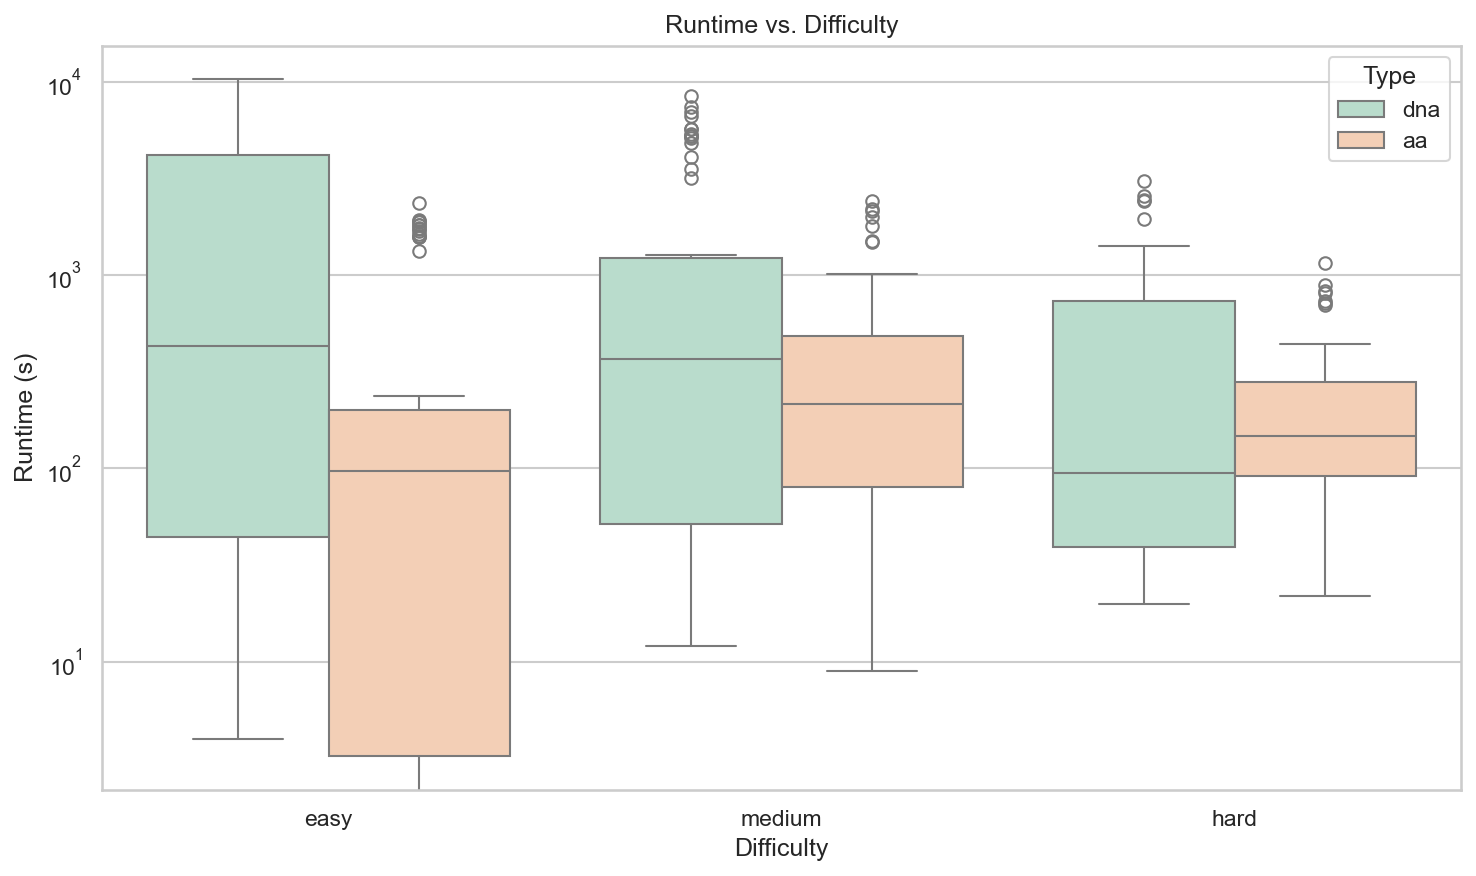

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x='Difficulty',
    y='Runtime_s',
    order=difficulty_order,
    hue='Type',
    palette='Pastel2'
)
plt.yscale('log')
plt.title("Runtime vs. Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Runtime (s)")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [ ]:
# Diagnostics: overview
print("Columns after cleaning:", list(df_clean.columns))
print(df_clean.dtypes)

# Ensure Max_iters_str exists
if 'Max_iters_str' not in df_clean.columns:
    # Automatically detect candidate columns (anything containing 'iter')
    iter_candidates = [c for c in df_clean.columns if re.search(r'iter', c, re.IGNORECASE)]
    
    # Fallback list in case no automatic matches are found
    if not iter_candidates:
        iter_candidates = ['Max_iters', 'max_iters', 'Iterations', 'iters', 'n_iters']
    
    src_col = next((c for c in iter_candidates if c in df_clean.columns), None)

    if src_col is None:
        # Final fallback: assign a single category to avoid seaborn errors
        df_clean['Max_iters_str'] = 'N/A'
    else:
        col = df_clean[src_col]
        if pd.api.types.is_numeric_dtype(col):
            df_clean['Max_iters_str'] = (
                pd.to_numeric(col, errors='coerce')
                .round()
                .astype('Int64')
                .astype(str)
            )
        else:
            df_clean['Max_iters_str'] = col.astype(str)

# Ensure Type exists (for facets) 
if 'Type' not in df_clean.columns:
    df_clean['Type'] = 'Overall'  # one facet

Spalten nach Bereinigung: ['Type', 'Difficulty', 'Epsilon', 'Dataset', 'Sequence_Number', 'Alignment_Length', 'Model', 'GAPS', 'Max_iters', 'Runtime_s', 'Final_Log_likelihood', 'RF_distance', 'Normalized_RF_distance', 'Output_Complete', 'Files_Complete', 'Comment']
Type                        object
Difficulty                category
Epsilon                    float64
Dataset                     object
Sequence_Number              int64
Alignment_Length             int64
Model                       object
GAPS                        object
Max_iters                    int64
Runtime_s                  float64
Final_Log_likelihood       float64
RF_distance                float64
Normalized_RF_distance     float64
Output_Complete              int64
Files_Complete               int64
Comment                     object
dtype: object


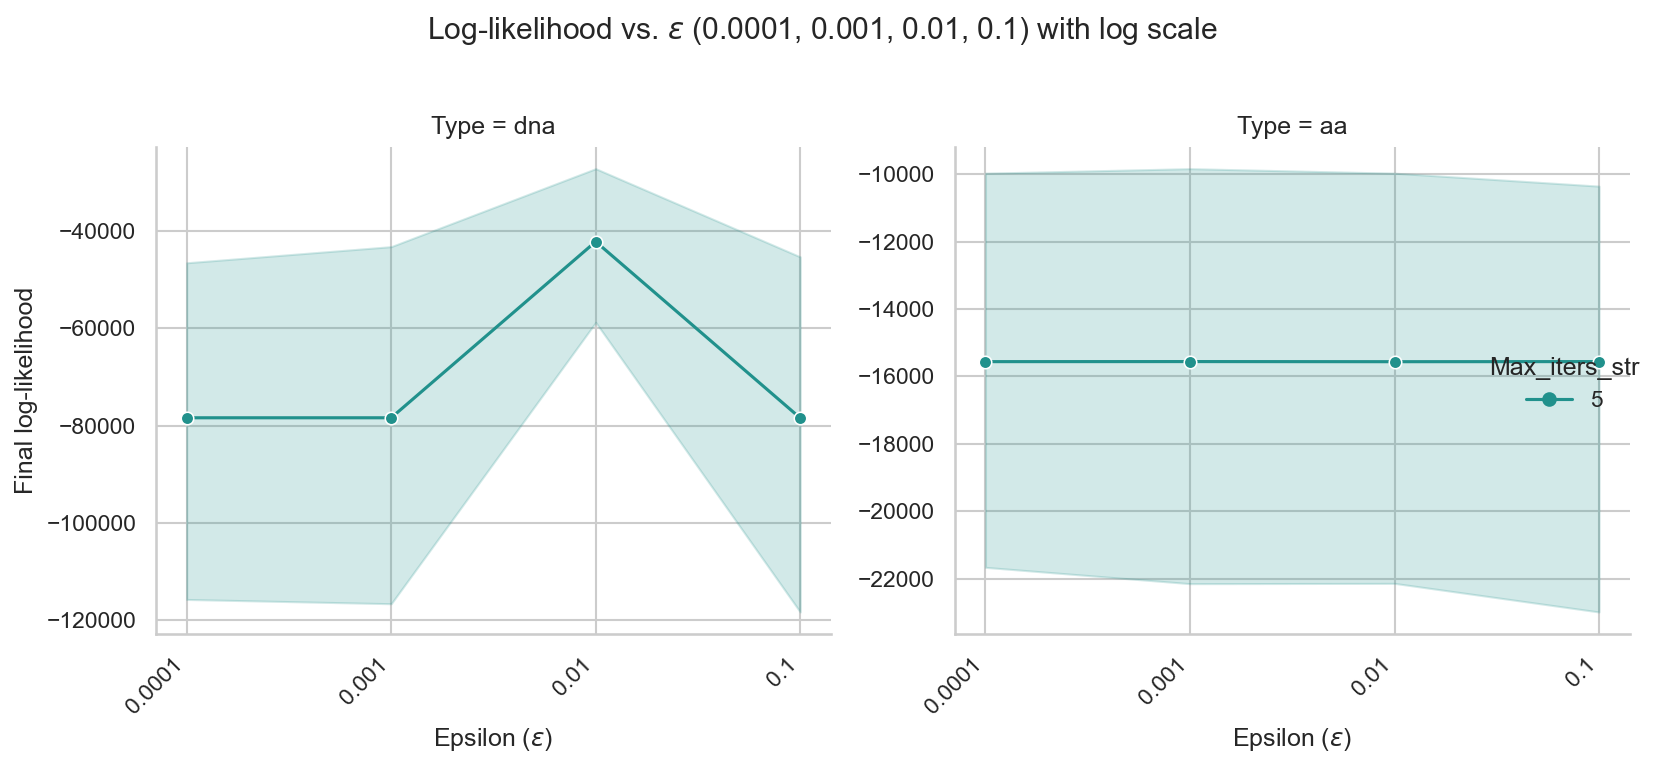

In [ ]:
# Sort legend/style values numerically if possible
def _key(v):
    try:
        return (0, int(v))
    except Exception:
        try:
            return (0, float(v))
        except Exception:
            return (1, str(v))

hue_order = sorted(df_clean['Max_iters_str'].dropna().unique(), key=_key)

epsilon_group_1 = [0.0001, 0.001, 0.01, 0.1]
epsilon_group_2 = [0.0005, 0.005, 0.5]

# Plot 
df_g1 = df_clean[df_clean['Epsilon'].isin(epsilon_group_1)].copy()
epsilon_ticks_g1 = sorted(df_g1['Epsilon'].unique())

g1 = sns.relplot(
    data=df_g1,
    x='Epsilon',
    y='Final_Log_likelihood',
    hue='Max_iters_str',
    style='Max_iters_str',
    hue_order=hue_order,
    style_order=hue_order,
    col='Type',
    kind='line',
    markers=True,
    dashes=False,
    palette='viridis',
    facet_kws={'sharey': False}
)

for ax in g1.axes.flat:
    ax.set_xscale('log')
    ax.set_xticks(epsilon_ticks_g1)
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xticklabels([f'{e:g}' for e in epsilon_ticks_g1], rotation=45, ha='right')

g1.set_axis_labels(r"Epsilon ($\epsilon$)", "Final log-likelihood")
g1.fig.suptitle(r"Log-likelihood vs. $\epsilon$ (0.0001, 0.001, 0.01, 0.1) with log scale", y=1.02)
g1.fig.tight_layout()
plt.show()

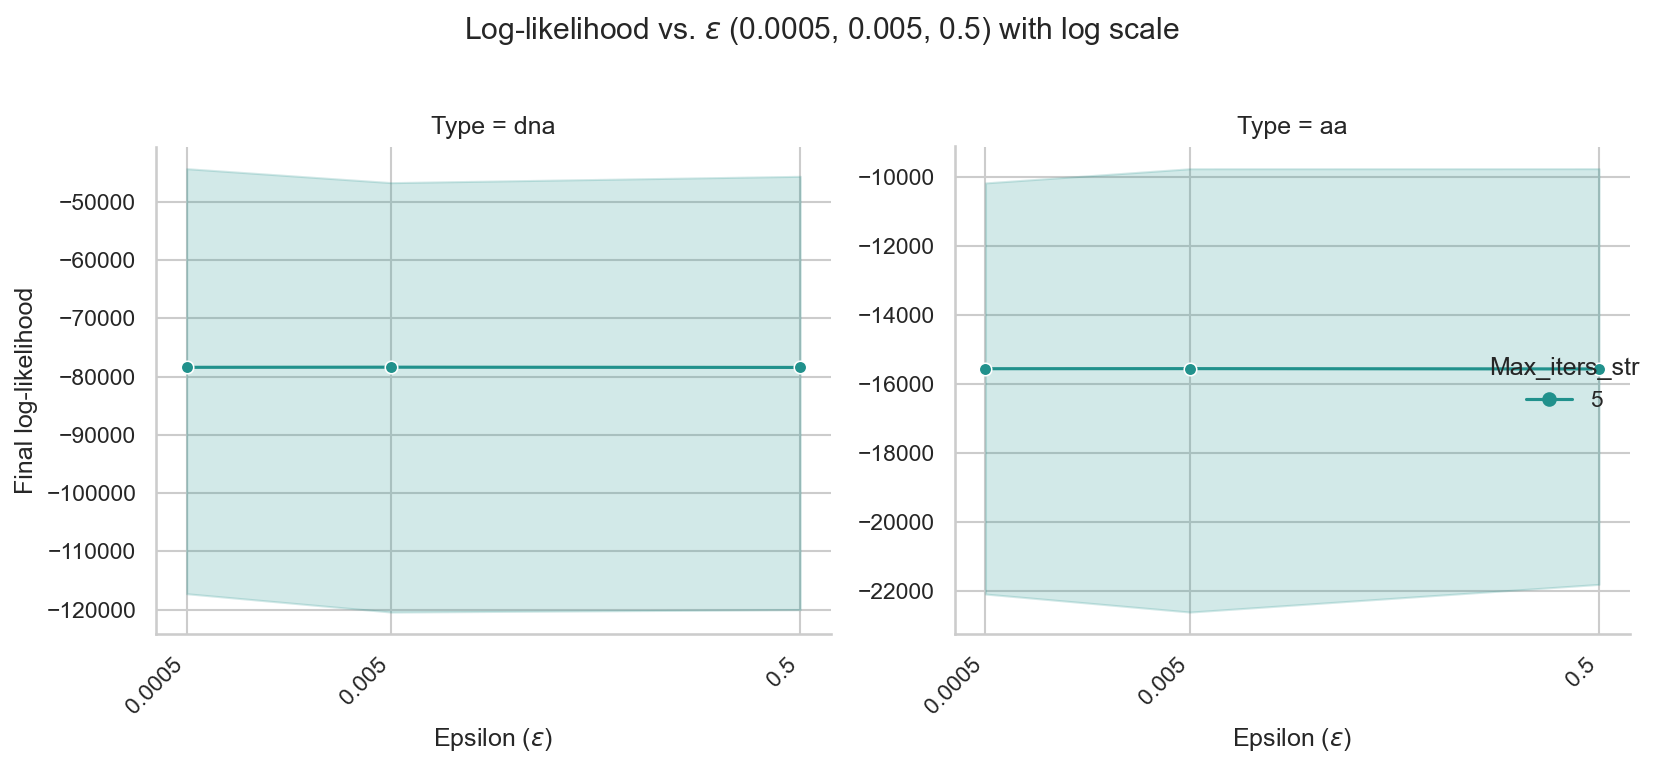

In [ ]:
# Plot
df_g2 = df_clean[df_clean['Epsilon'].isin(epsilon_group_2)].copy()
epsilon_ticks_g2 = sorted(df_g2['Epsilon'].unique())

g2 = sns.relplot(
    data=df_g2,
    x='Epsilon',
    y='Final_Log_likelihood',
    hue='Max_iters_str',
    style='Max_iters_str',
    hue_order=hue_order,
    style_order=hue_order,
    col='Type',
    kind='line',
    markers=True,
    dashes=False,
    palette='viridis',
    facet_kws={'sharey': False}
)

for ax in g2.axes.flat:
    ax.set_xscale('log')
    ax.set_xticks(epsilon_ticks_g2)
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xticklabels([f'{e:g}' for e in epsilon_ticks_g2], rotation=45, ha='right')

g2.set_axis_labels(r"Epsilon ($\epsilon$)", "Final log-likelihood")
g2.fig.suptitle(r"Log-likelihood vs. $\epsilon$ (0.0005, 0.005, 0.5) with log scale", y=1.02)
g2.fig.tight_layout()
plt.show()

Runtime vs. Alignment length

Text(0.5, 1.0, 'Runtime vs. Alignment Length')

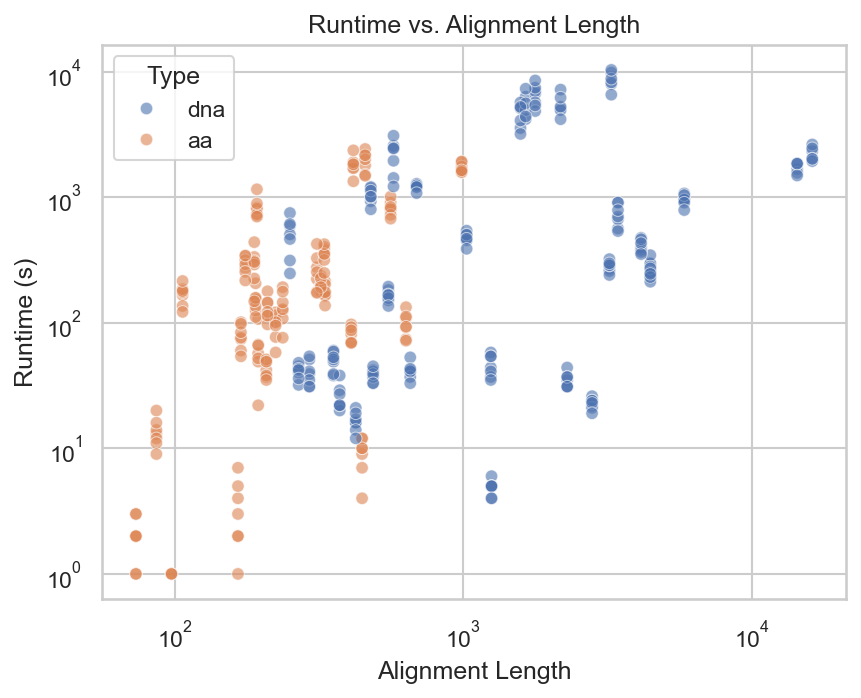

In [34]:
sns.scatterplot(
    data=df_clean,
    x='Alignment_Length',
    y='Runtime_s',
    hue='Type',
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alignment Length')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs. Alignment Length')

Parameter sensitivity - Runtime vs. Epsilon

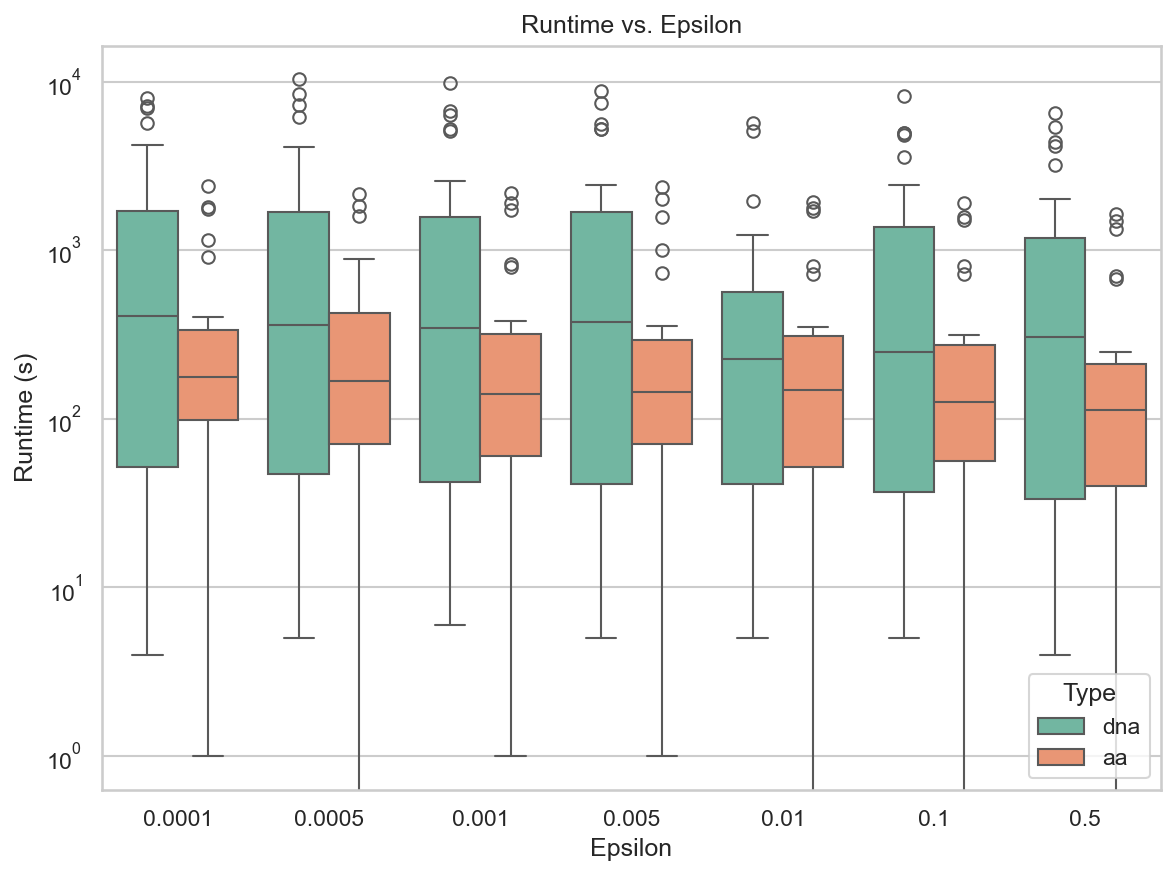

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_clean,
    x='Epsilon',
    y='Runtime_s',
    hue='Type',
    palette='Set2'
)
plt.yscale('log')
plt.title('Runtime vs. Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Runtime (s)')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Runtime vs. Sequencenumber

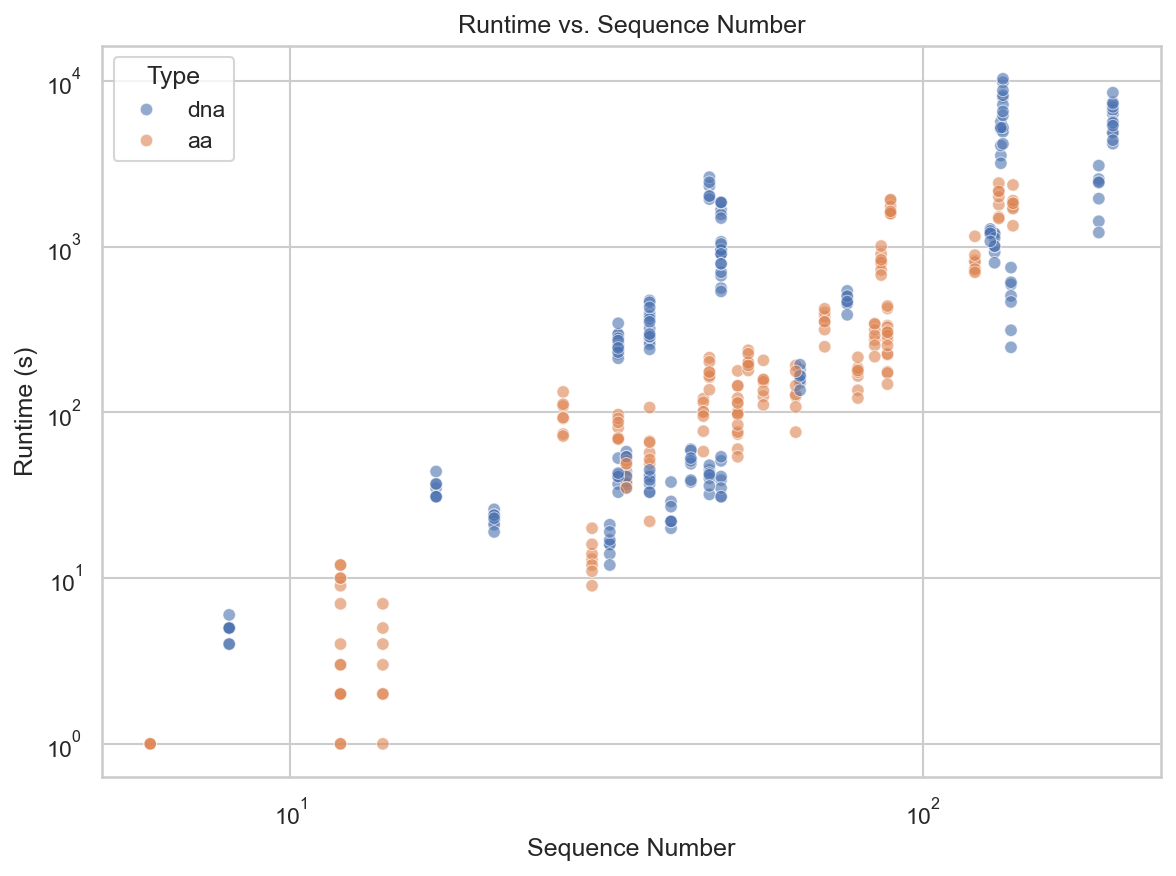

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clean,
    x='Sequence_Number',
    y='Runtime_s',
    hue='Type',
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Runtime vs. Sequence Number')
plt.xlabel('Sequence Number')
plt.ylabel('Runtime (s)')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

RF-Distance vs. Final Log-Likelihood

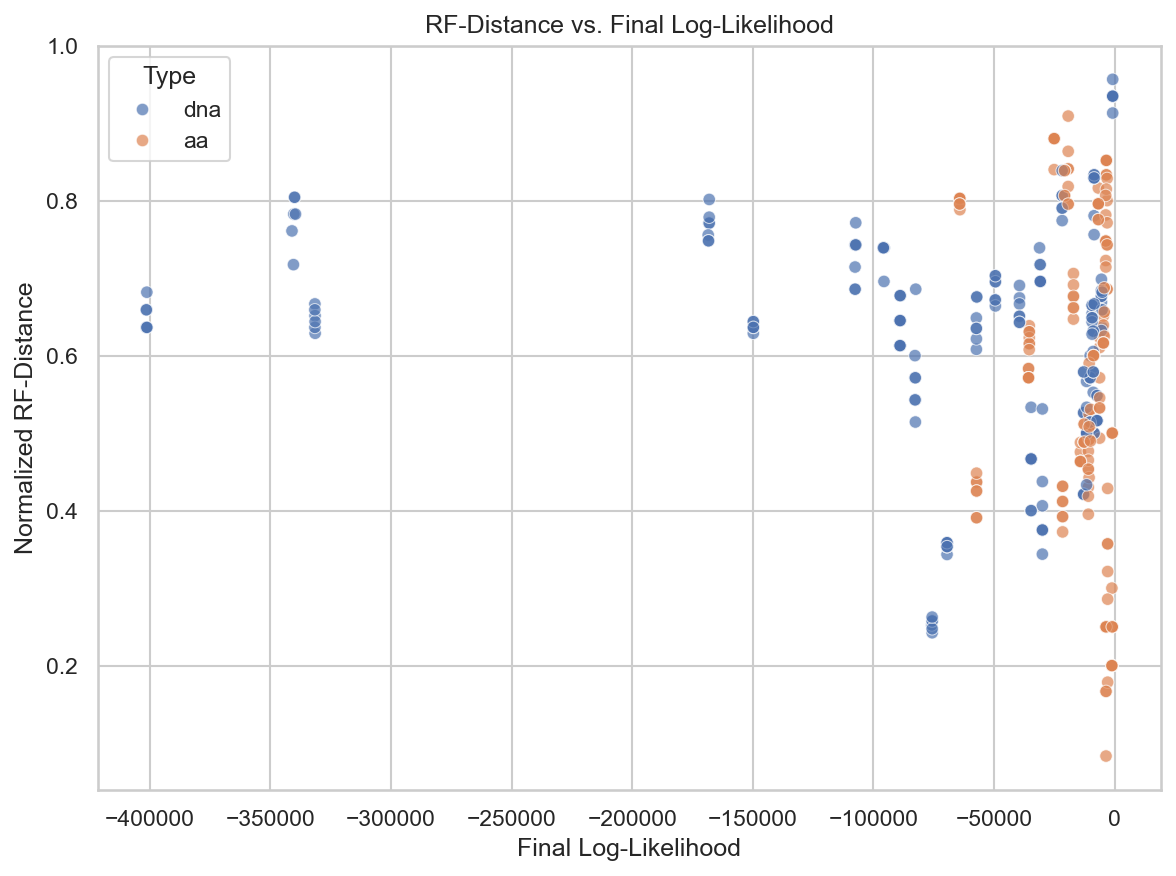

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clean,
    x='Final_Log_likelihood',
    y='Normalized_RF_distance',
    hue='Type',
    alpha=0.7
)
plt.title('RF-Distance vs. Final Log-Likelihood')
plt.xlabel('Final Log-Likelihood')
plt.ylabel('Normalized RF-Distance')
plt.legend(title='Type')
plt.tight_layout()
plt.show()